# Assignment: Image Classification Using CNNs

In [34]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

## Load CIFAR-10 Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Task 1: Data Exploration and Preparation

### 1. Display 5 images along with their corresponding labels

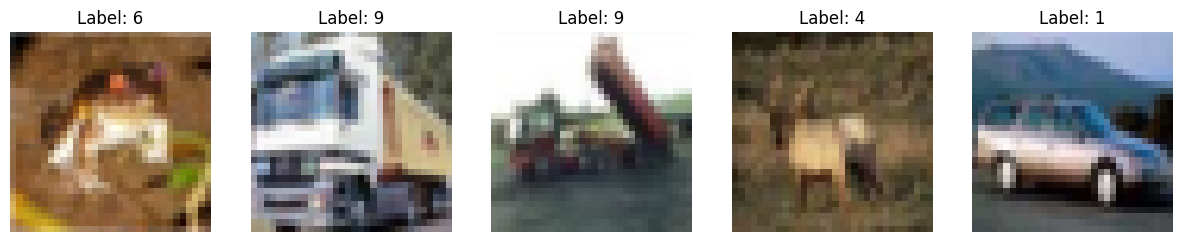

In [4]:
# Display 5 sample images with labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].set_title(f"Label: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()

### 2. Print the shape of dataset and count of unique labels



*   Training data has 50,000 images. Each image is 32x32 pixels with Red, Green and Blue channels.
*   Similarly, the test data has 10,000 images.
*   There are 10 unique labels ranging from 0 to 10.





In [5]:
 print("Training data shape:", X_train.shape)
 print("Test data shape:", X_test.shape)
 print("Unique labels:", np.unique(y_train))

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]




*   There are 5000 records for each label.



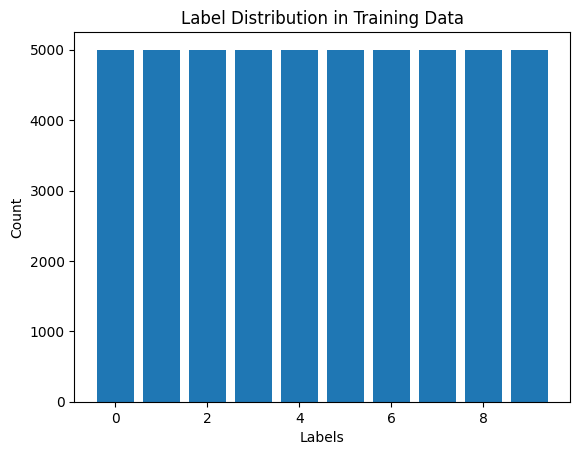

In [10]:
# Count the occurrences of each label in the training dataset
unique_labels, label_counts = np.unique(y_train, return_counts=True)

plt.bar(unique_labels, label_counts)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Label Distribution in Training Data")
plt.show()

### 3. Normalize the image pixel values to 0 -1 range

In [8]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

### 4. Split dataset into training and testing sets


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Task 2: Build and Train a CNN Model

### 1. Design a simple CNN model

In [26]:
# Define the CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])



1.   Input layer: - Accepts 32x32 pixel RGB images
2.   Conv2D: 32 filters of size 3x3 with ReLU activation function.
3.   Maxpooling2D: Reduce dimensions of input image using a 2x2 window.
4.   Dropout: Rate 0.2 helps prevent overfitting.
5.   Points 2 to 3 are repeated again with 64 filters of size 3x3, maxpooling of 2x2 and dropout rate of 0.3.
6.   Flatten layer converts 2D feature maps into 1D feature vectors.
7.   Dense to create fully connected hidden layers with 128 neurons using ReLU activation function and 10 neurons using softmax activation for multiclass classification.



### 2. Compile the model

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 3. Train model on training sets

In [16]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 94ms/step - accuracy: 0.2945 - loss: 1.9104 - val_accuracy: 0.5090 - val_loss: 1.3724
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.4899 - loss: 1.4155 - val_accuracy: 0.5799 - val_loss: 1.2133
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.5454 - loss: 1.2665 - val_accuracy: 0.5976 - val_loss: 1.1515
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.5762 - loss: 1.1957 - val_accuracy: 0.6305 - val_loss: 1.0710
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - accuracy: 0.5994 - loss: 1.1364 - val_accuracy: 0.6532 - val_loss: 0.9956
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6148 - loss: 1.0914 - val_accuracy: 0.6603 - val_loss: 0.9672
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.6332 - loss: 1.0354 - val_accuracy: 0.6740 - val_loss: 0.9404
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.6462 - loss: 1.0129 - 

### 4. Training and validation loss and accuracy curves

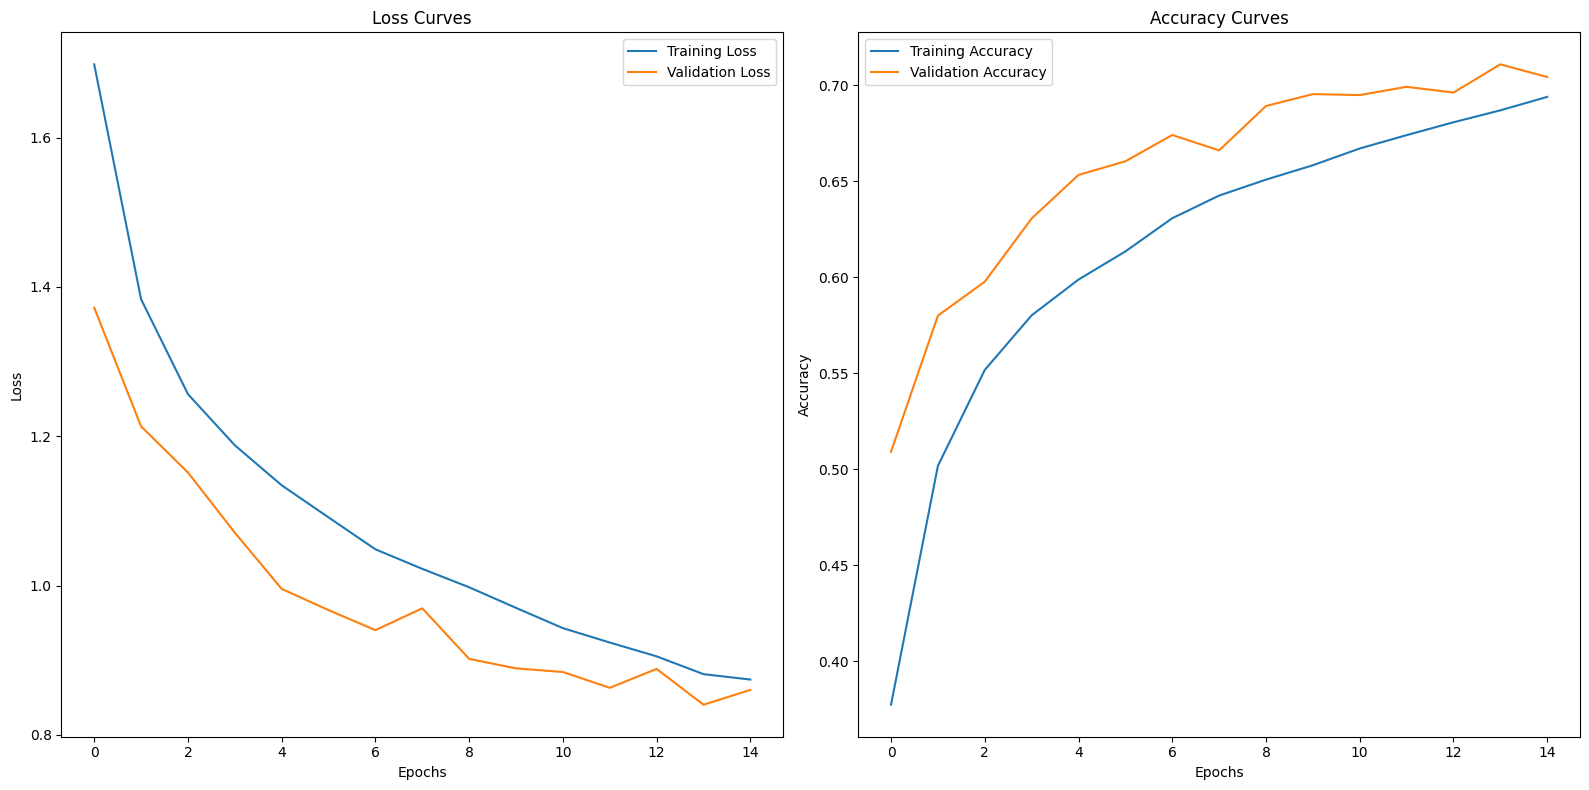

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot training and validation curves
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curves')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Curves')
axes[1].legend()

plt.tight_layout()
plt.show()



*   Both training and validation loss decrease steadily over epochs
*   Validation loss is slightly lower than training loss at the end of training.
*   Both training and validation accuracy increases steadily.
*   Validation accuracy is slightly higher that training accuracy at the end of training.
*   Since training and validation losses are close to each other, this means the model generalizes well to unseen data.
*   The training and validation accuracy are also quite close, indicating that the model is learning effectively and not memorizing the training data.





## Task 3. Evaluate the Model

### 1. Evaluate on test set and get accuracy

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7046 - loss: 0.8643
Test accuracy: 70.12%


### 2. Confusion matrix and classification report

In [20]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74      1000
           1       0.87      0.80      0.83      1000
           2       0.67      0.52      0.59      1000
           3       0.48      0.50      0.49      1000
           4       0.67      0.59      0.63      1000
           5       0.54      0.71      0.62      1000
           6       0.74      0.81      0.77      1000
           7       0.72      0.79      0.75      1000
           8       0.83      0.79      0.81      1000
           9       0.78      0.81      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000





*   71% of predictions are correct.



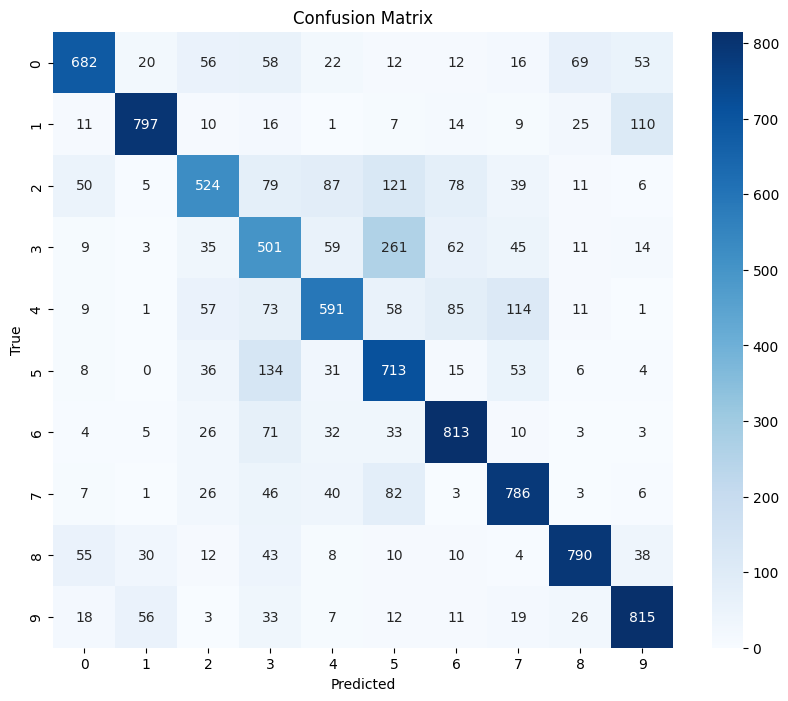

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 3. Examples of correctly and incorrectly classified images

Correctly Classified Examples:


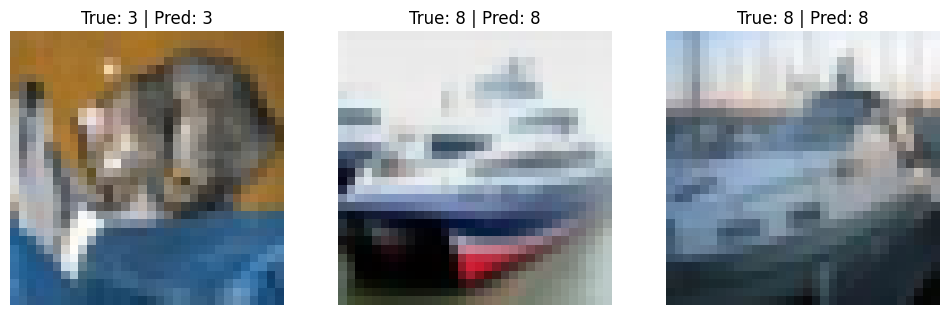

Incorrectly Classified Examples:


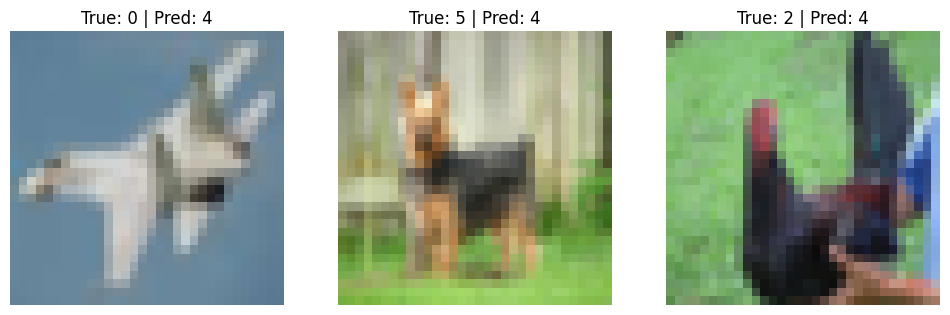

In [31]:
# Identify correctly and incorrectly classified images
correct_indices = np.where(y_pred == y_test.flatten())[0]
incorrect_indices = np.where(y_pred != y_test.flatten())[0]

# Plot 3 correctly classified images
print("Correctly Classified Examples:")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, idx in enumerate(correct_indices[:3]):
    axes[i].imshow(X_test[idx])
    axes[i].set_title(f"True: {y_test[idx][0]} | Pred: {y_pred[idx]}")
    axes[i].axis('off')
plt.show()

# Plot 3 incorrectly classified images
print("Incorrectly Classified Examples:")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, idx in enumerate(incorrect_indices[:3]):
    axes[i].imshow(X_test[idx])
    axes[i].set_title(f"True: {y_test[idx][0]} | Pred: {y_pred[idx]}")
    axes[i].axis('off')
plt.show()

## Task 4. Experimentation with model improvements

In [33]:
for optimizer in ['sgd', 'rmsprop']:
    print(f"Using Optimizer: {optimizer}")
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

Using Optimizer: sgd
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 88ms/step - accuracy: 0.6305 - loss: 1.0468 - val_accuracy: 0.6674 - val_loss: 0.9758
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6518 - loss: 0.9936 - val_accuracy: 0.6641 - val_loss: 1.0125
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.6557 - loss: 0.9922 - val_accuracy: 0.6826 - val_loss: 0.9298
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.6654 - loss: 0.9696 - val_accuracy: 0.6778 - val_loss: 0.9345
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6662 - loss: 0.9591 - val_accuracy: 0.6818 - val_loss: 0.9210
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.6686 - loss: 0.9424 - val_accuracy: 0.6879 - val_loss: 0.9049
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.6667 - loss: 0.9541 - val_accuracy: 0.6857 - val_loss: 0.9110
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.6



*   Optmizer set as sgd and rmsprop



### Performance comparison table

In [35]:
# Create a dictionary with the data
data = {
    "Optimizer": ["Adam", "SGD", "RMSProp"],
    "Training Accuracy (Epoch 15)": [0.6939, 0.6825, 0.7068],
    "Validation Accuracy (Epoch 15)": [0.7042, 0.6950, 0.6814]
}

# Convert the dictionary to a pandas DataFrame
performance_table = pd.DataFrame(data)

# Display the table
performance_table

,Optimizer,Training Accuracy (Epoch 15),Validation Accuracy (Epoch 15)
0,Adam,0.6939,0.7042
1,SGD,0.6825,0.6950
2,RMSProp,0.7068,0.6814




*   Adam optimizer appears to be a better choice since since it provided a good balance between training and validation set.

